In [1]:
import pandas as pd
import geopandas as gpd
import transbigdata as tbd
import warnings
warnings.filterwarnings('ignore')

# 获得栅格坐标系的params

In [2]:
bounds = (120.85, 30.67, 122.24, 31.87)
#Obtain the gridding parameters
params = tbd.area_to_params(bounds,accuracy = 500)
params

{'slon': 120.85,
 'slat': 30.67,
 'deltalon': 0.00526084418765975,
 'deltalat': 0.004496605206422906,
 'theta': 0,
 'method': 'rect',
 'gridsize': 500}

# 读取数据并绘图

In [19]:
grid = pd.read_csv('上海24小时人口热力分布/data/20190915sh.csv')
grid['geometry'] = tbd.grid_to_polygon([grid['loncol'], grid['latcol']],params)
grid = gpd.GeoDataFrame(grid)
grid['count'] = grid['count']*4/10000

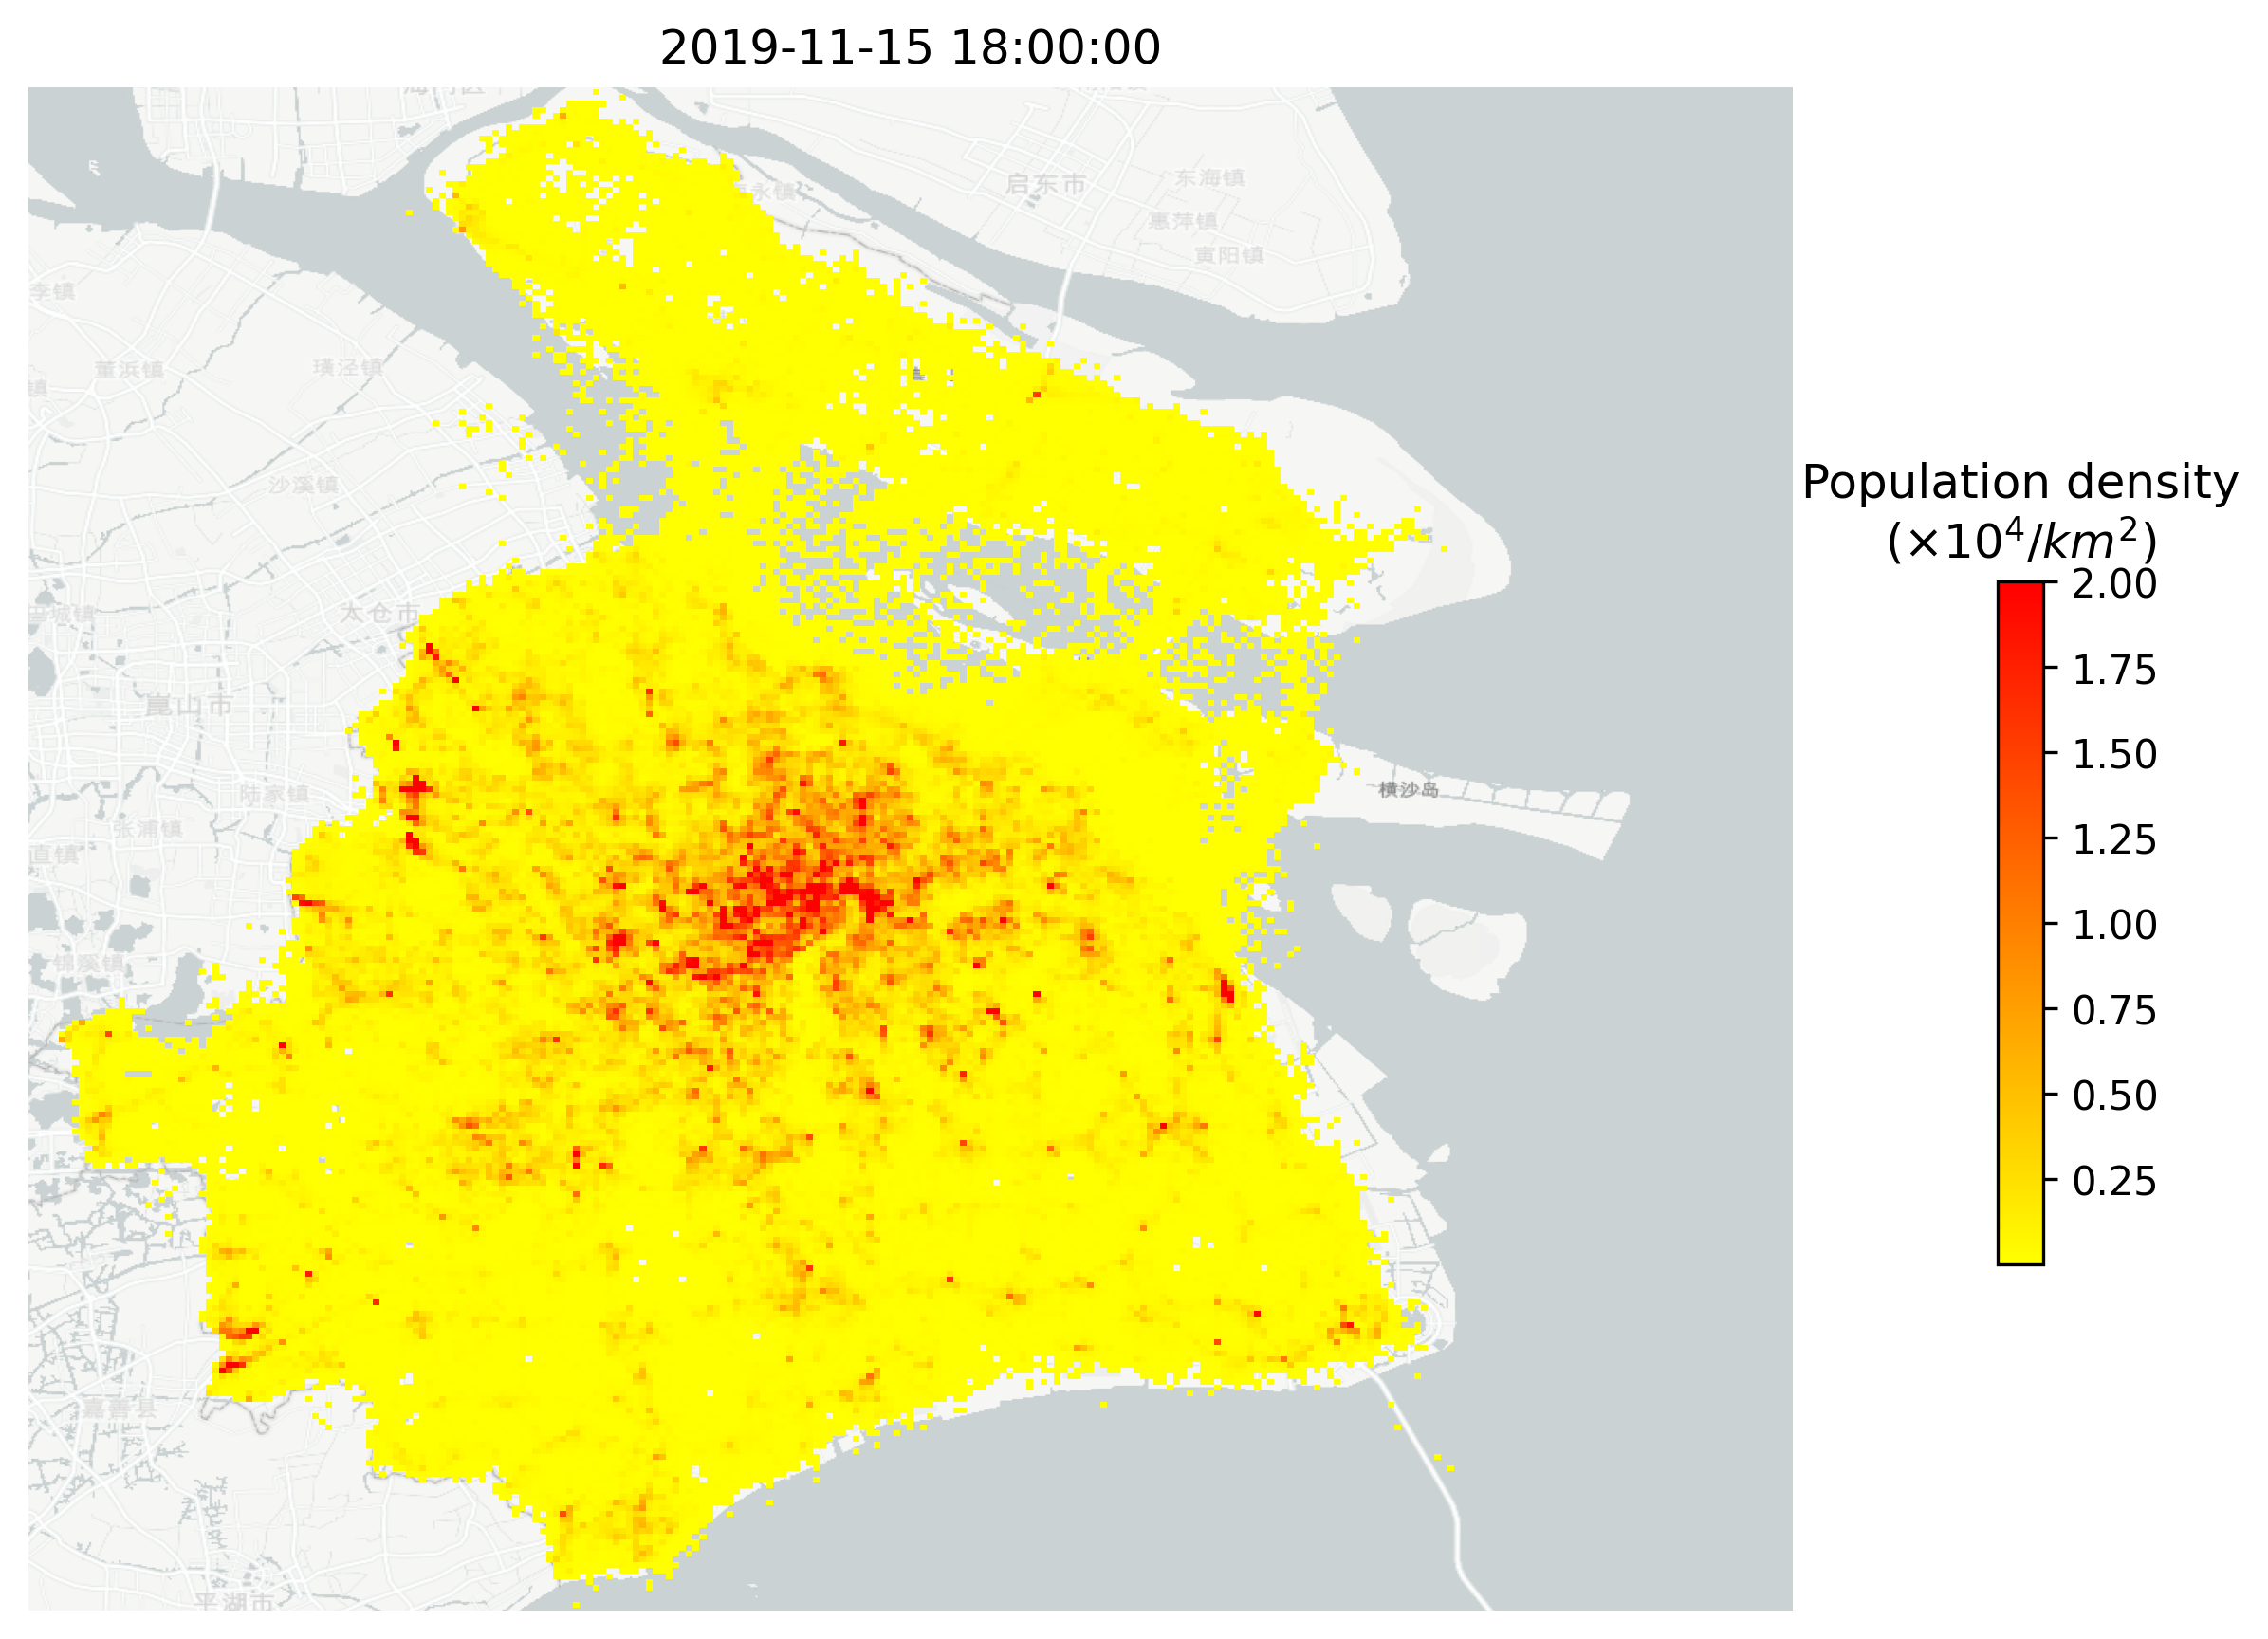

In [27]:
thistime = '2019-11-15 18:00:00'
grid_this = grid[grid['interval_start_time'] == thistime]

#Create figure
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)

# 绘制colorbar
cax = plt.axes([0.99, 0.32,0.02, 0.3])  # colorbar的位置, [左, 下, 宽, 高]
plt.title('Population density\n($×10^4/km^2$)')
plt.sca(ax)
#Load basemap
tbd.plot_map(plt,bounds,zoom = 10,style = 6)
#Set colormap
from matplotlib.colors import ListedColormap

grid_this.plot(column = 'count',cmap = 'autumn_r',ax = ax,vmax = 2,legend=True,cax = cax)

plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.title(thistime)
plt.show()


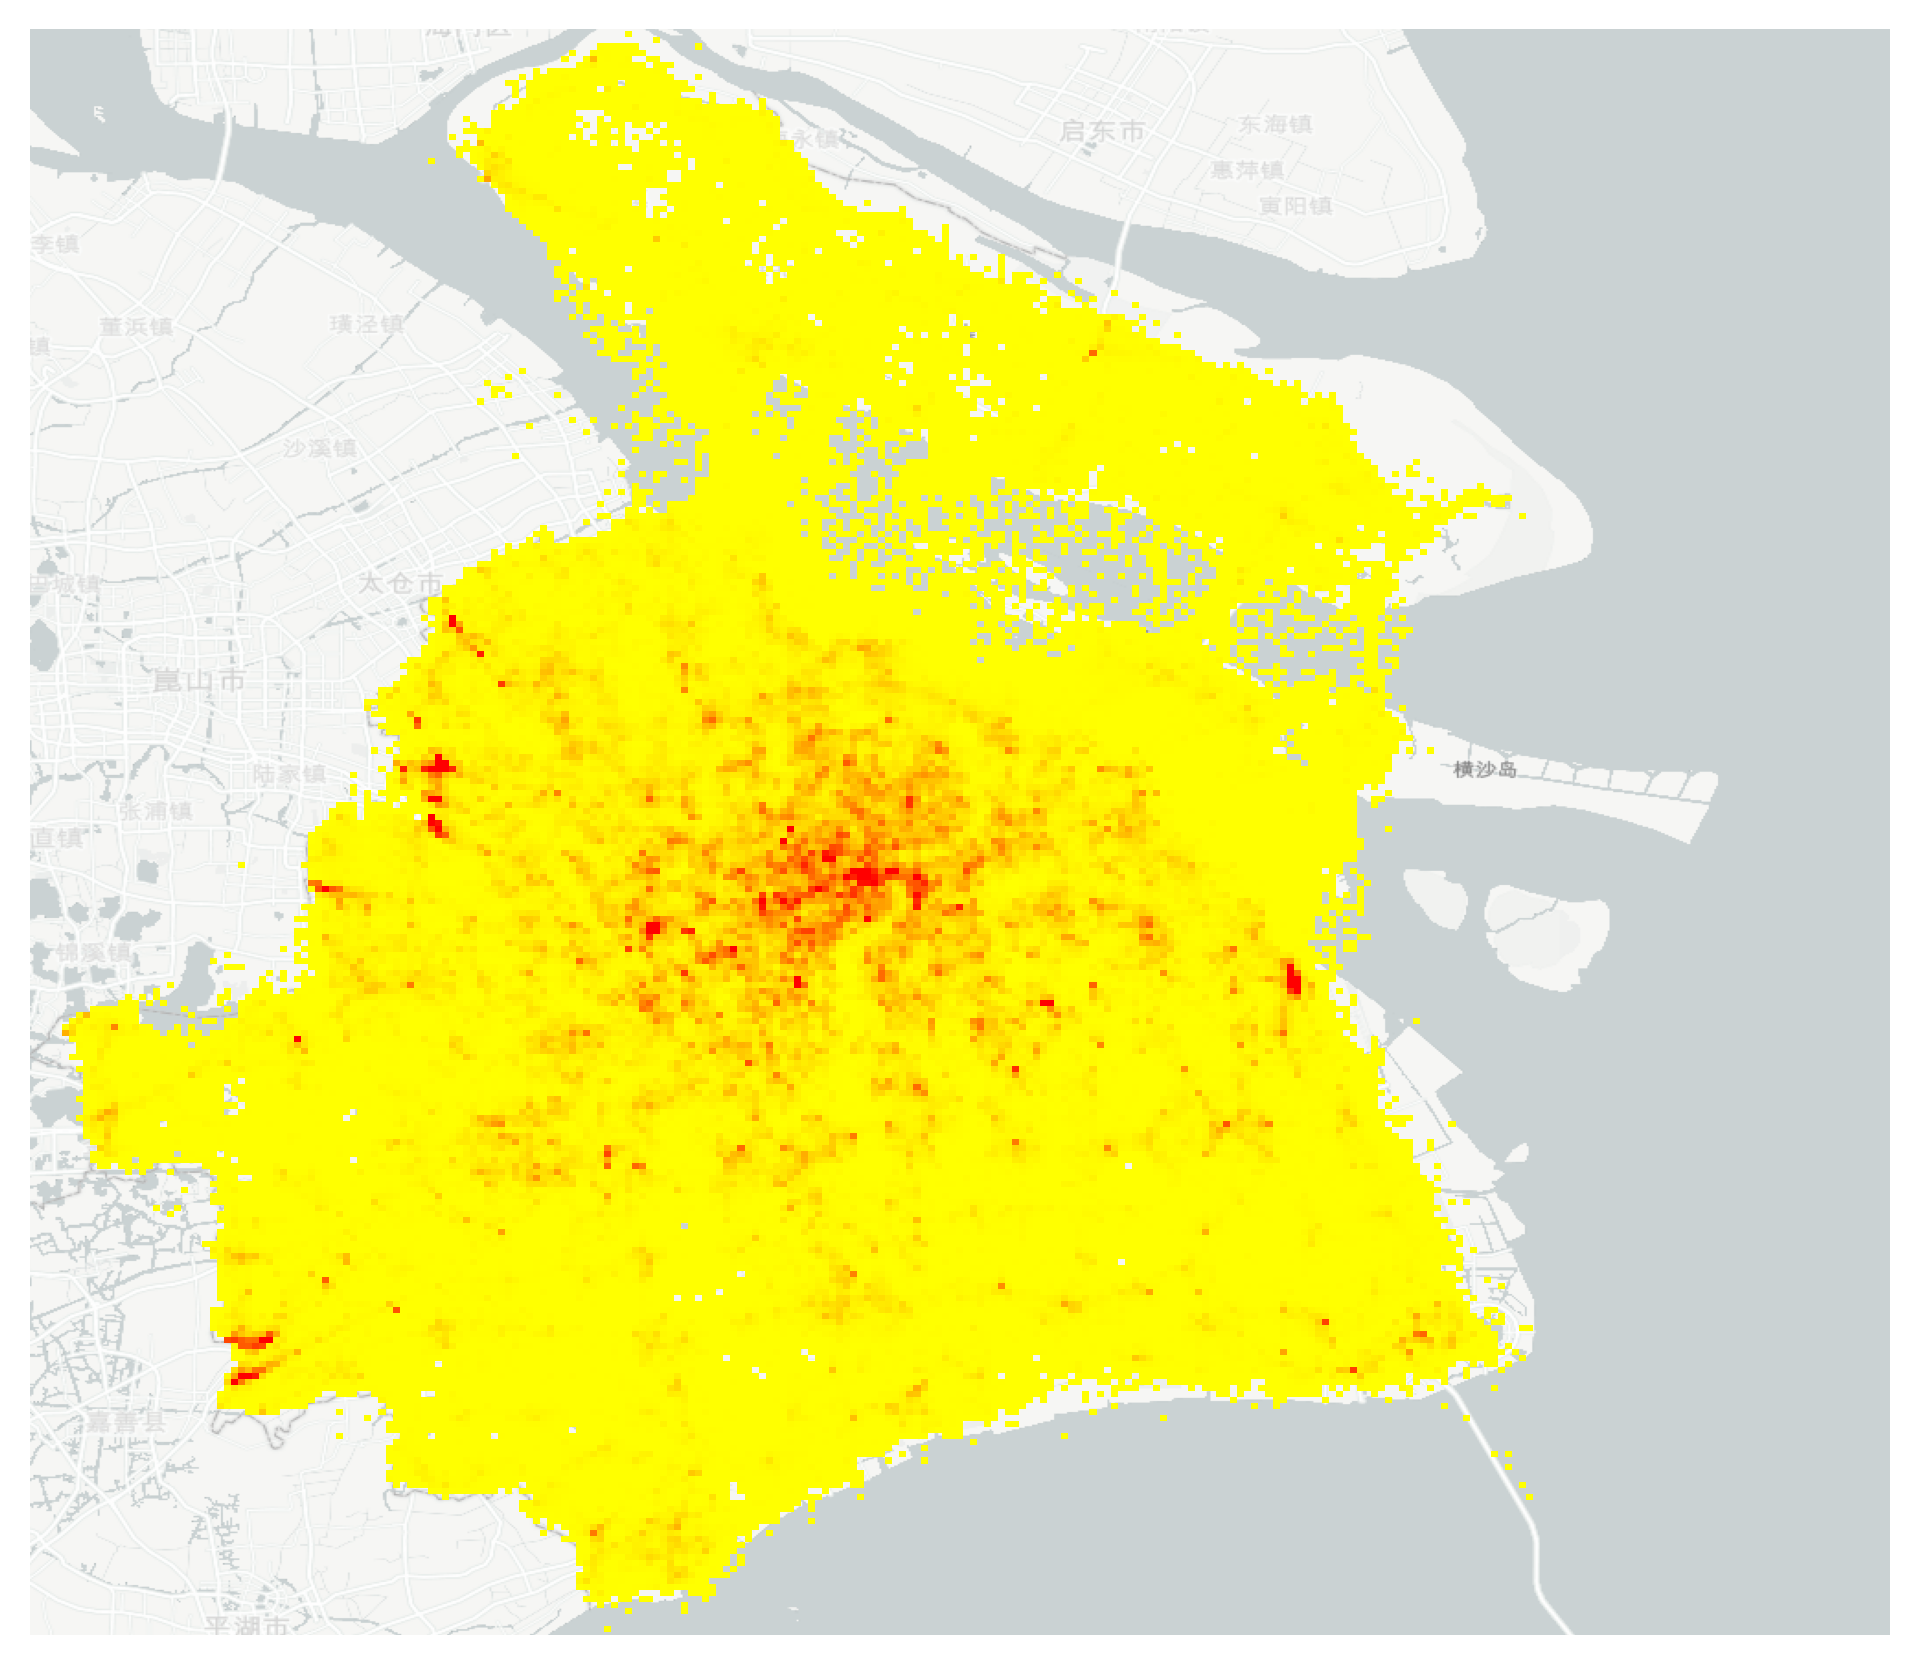

In [6]:
grid = pd.read_csv('导出的数据/居住地分布.csv')
grid['geometry'] = tbd.grid_to_polygon([grid['homeloncol'], grid['homelatcol']],params)
grid = gpd.GeoDataFrame(grid)
#Create figure
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)
plt.sca(ax)
#Load basemap
tbd.plot_map(plt,bounds,zoom = 10,style = 6)
#Set colormap
from matplotlib.colors import ListedColormap

grid.plot(column = 'count',cmap = 'autumn_r',ax = ax,vmax = 10000)

plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

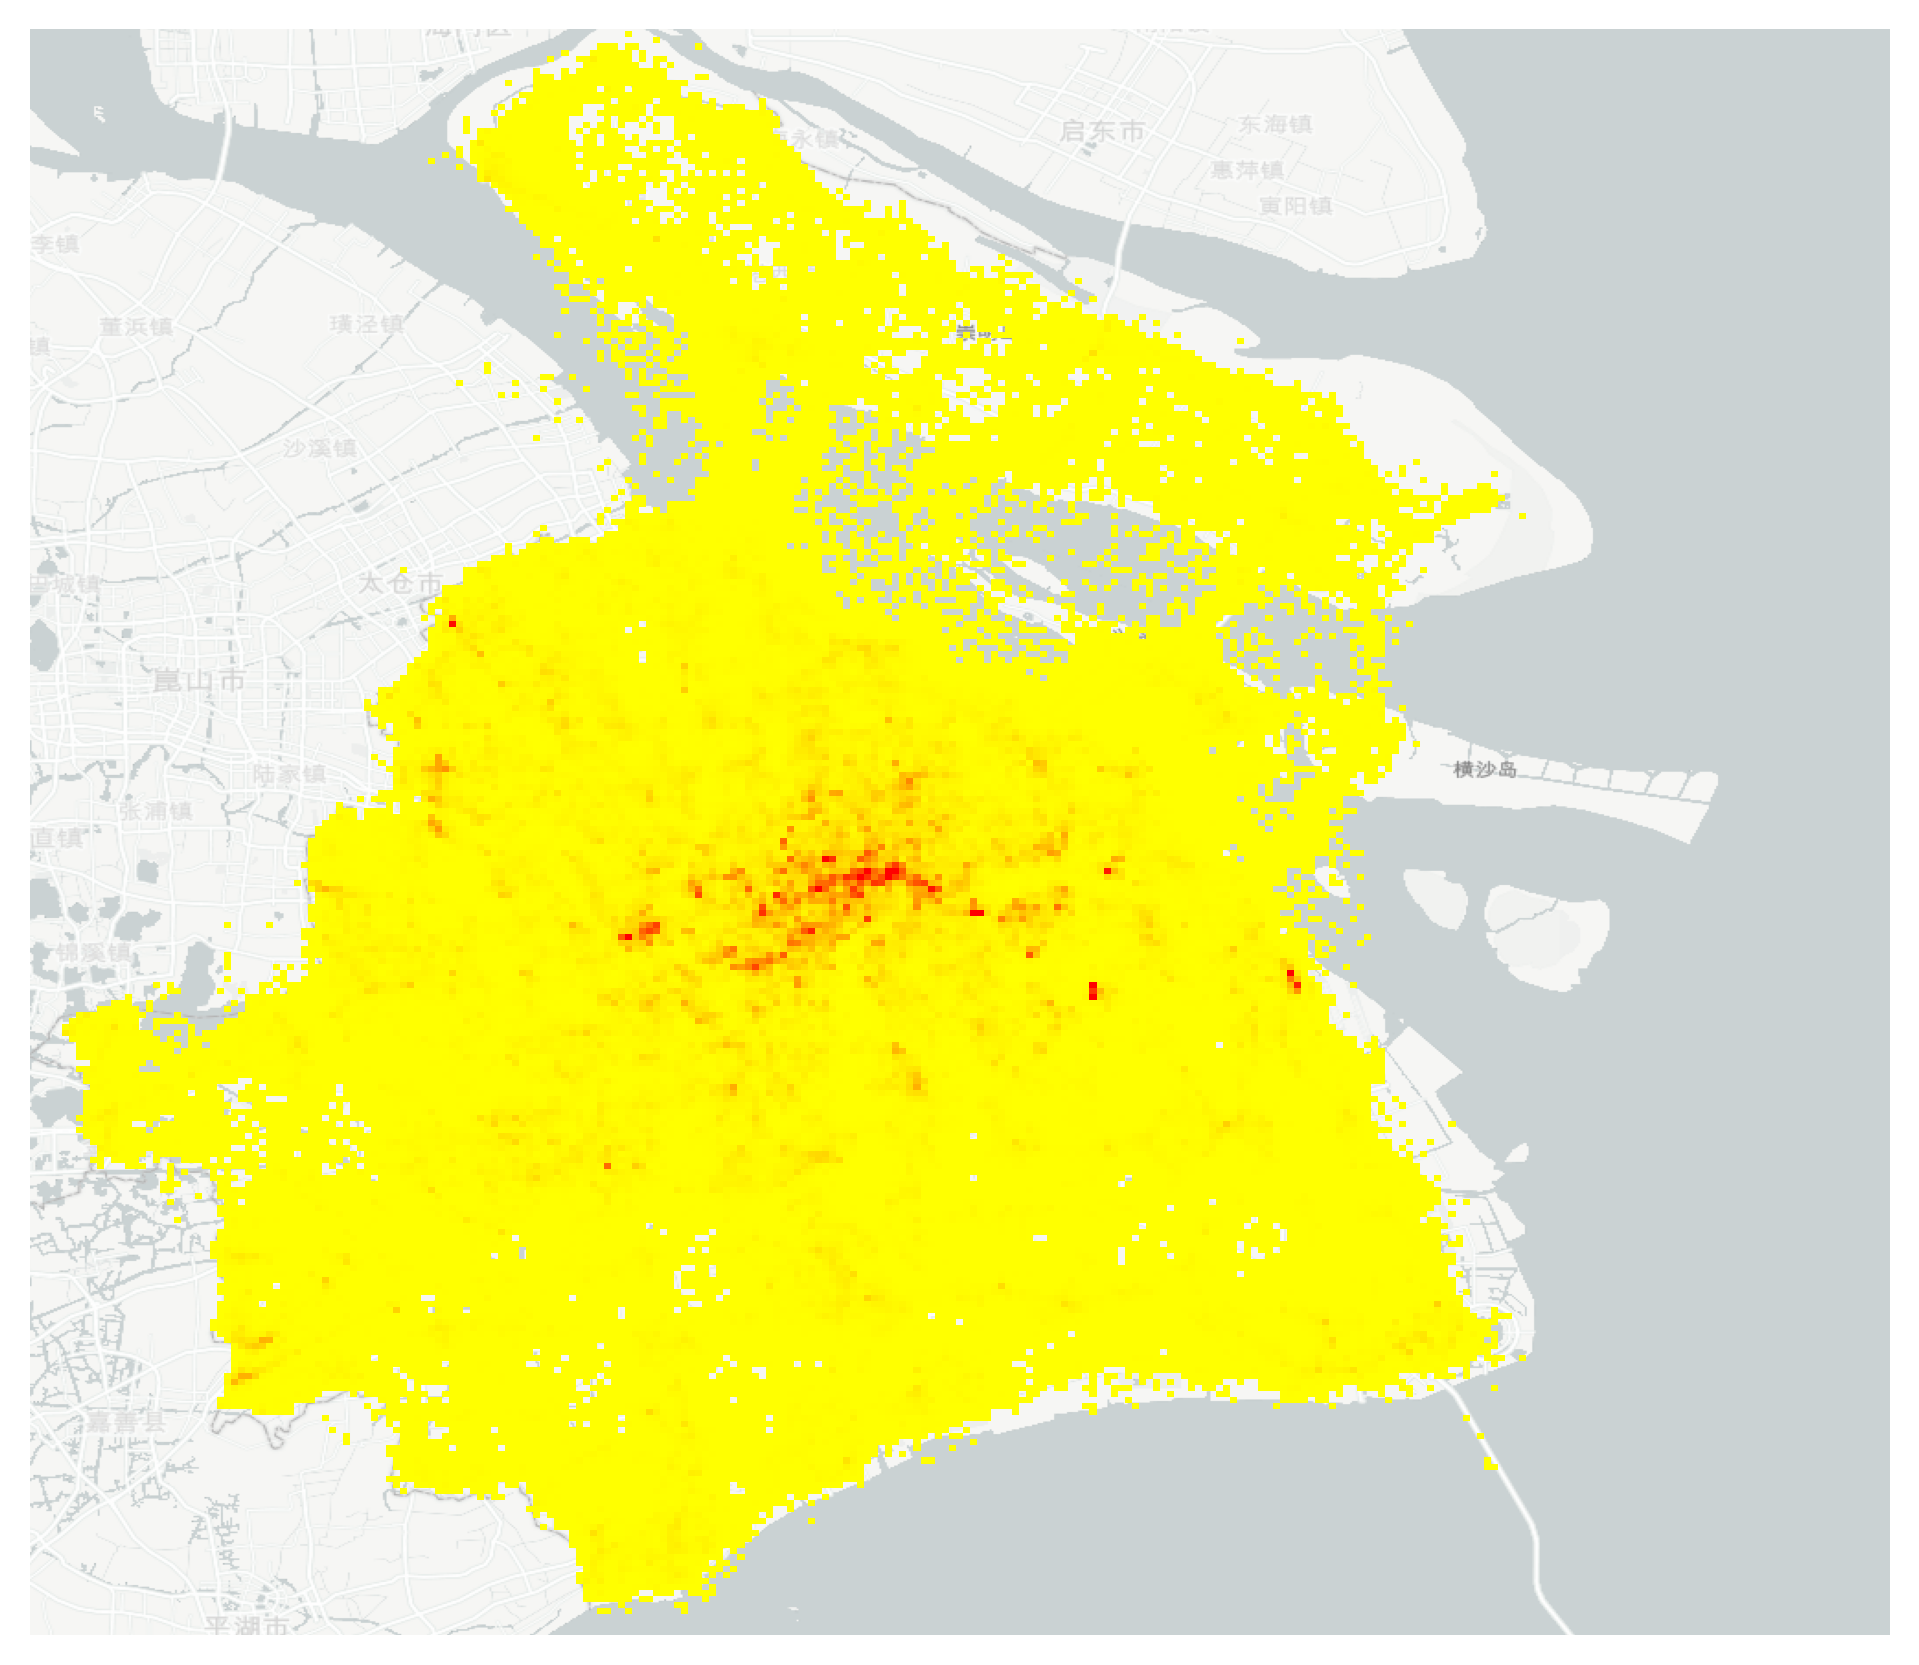

In [8]:
grid = pd.read_csv('导出的数据/工作地分布.csv')
grid['geometry'] = tbd.grid_to_polygon([grid['workloncol'], grid['worklatcol']],params)
grid = gpd.GeoDataFrame(grid)
#Create figure
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)
plt.sca(ax)
#Load basemap
tbd.plot_map(plt,bounds,zoom = 10,style = 6)
#Set colormap
from matplotlib.colors import ListedColormap

grid.plot(column = 'count',cmap = 'autumn_r',ax = ax,vmax = 10000)

plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()